Mask 0 unique values: [0 1 2 3]
Mask 1 unique values: [0 1 2 3]
Mask 2 unique values: [0 1 2 3]
Mask 3 unique values: [0 1 2 3]
Mask 4 unique values: [0 1 2 3]
Mask 5 unique values: [0 1 2 3]
Mask 6 unique values: [0 1 2 3]
Mask 7 unique values: [0 1 2 3]
Mask 8 unique values: [0 1 2 3]
Mask 9 unique values: [0 1 2 3]


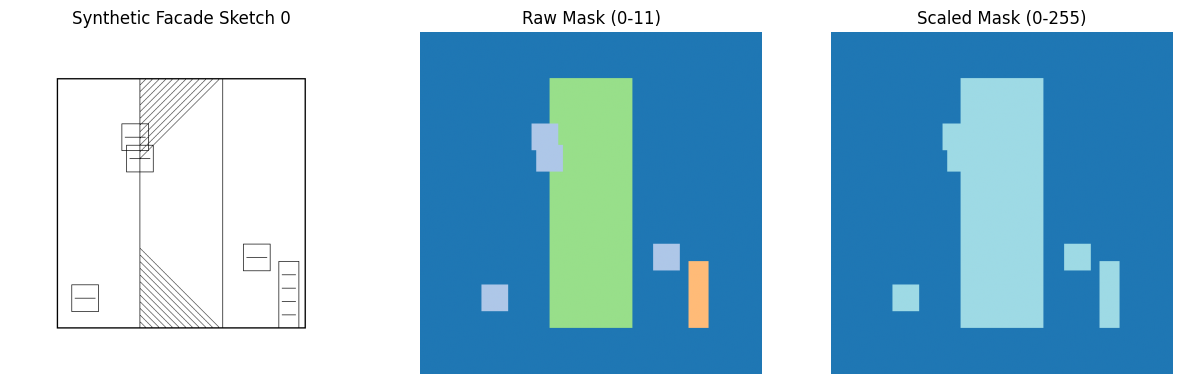

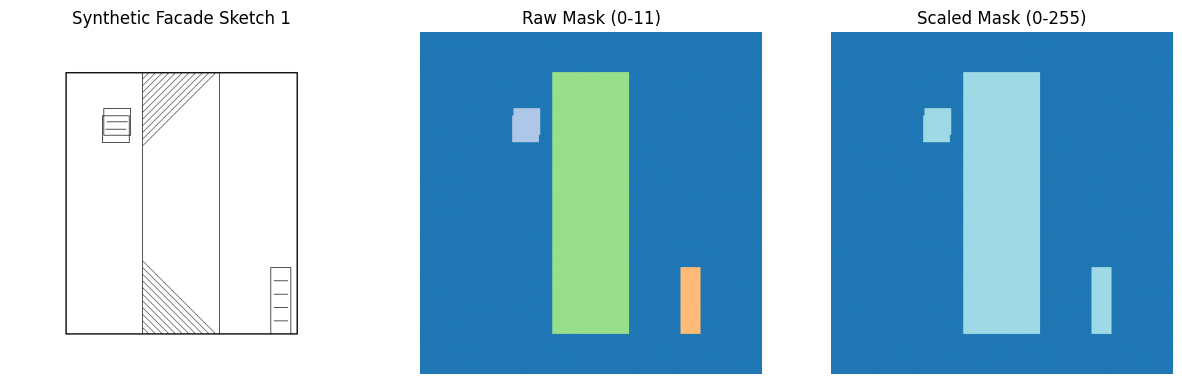

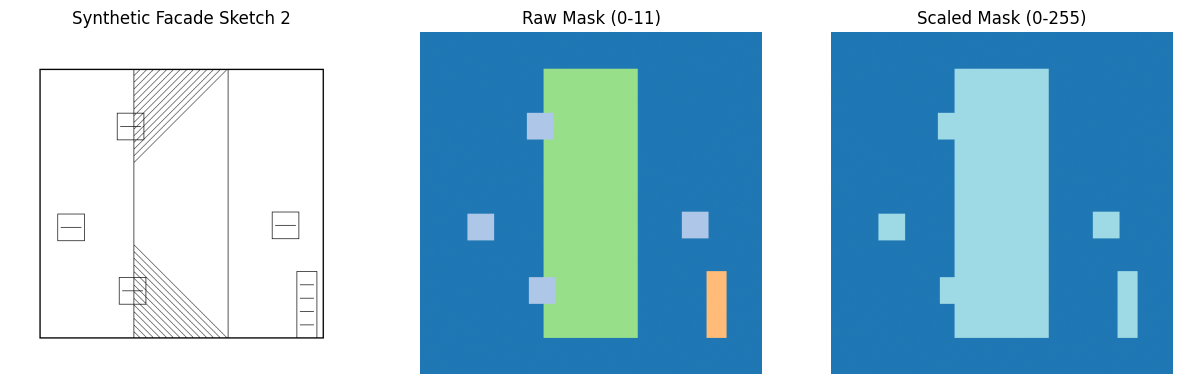

Generated 10 synthetic facade sketches and masks.


In [24]:
import os
import numpy as np
from PIL import Image, ImageDraw
import random
import matplotlib.pyplot as plt
from pathlib import Path

def generate_synthetic_facade(width=512, height=512, idx=0):
    # Create blank canvas for sketch
    sketch = Image.new("L", (width, height), 255)  # White background
    draw = ImageDraw.Draw(sketch)
    mask = np.zeros((height, width), dtype=np.uint8)  # Segmentation mask

    # Draw building outline (wall, class 0)
    building_width = random.randint(int(width * 0.6), int(width * 0.9))
    building_height = random.randint(int(height * 0.7), int(height * 0.9))
    top_left = (width // 2 - building_width // 2, height // 2 - building_height // 2)
    bottom_right = (top_left[0] + building_width, top_left[1] + building_height)
    draw.rectangle([top_left, bottom_right], outline=0, width=2)
    mask[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = 0  # Wall

    # Draw textured wall section (class 3, with cross-hatching)
    texture_width = building_width // 3
    texture_x = top_left[0] + building_width // 3
    texture_box = (texture_x, top_left[1], texture_x + texture_width, bottom_right[1])
    draw.rectangle(texture_box, outline=0, width=1)
    for i in range(0, texture_width, 10):
        draw.line((texture_x + i, top_left[1], texture_x, top_left[1] + i), fill=0, width=1)
        draw.line((texture_x, bottom_right[1] - i, texture_x + i, bottom_right[1]), fill=0, width=1)
    mask[top_left[1]:bottom_right[1], texture_x:texture_x + texture_width] = 3  # Textured wall

    # Draw windows (class 1)
    num_windows = random.randint(3, 8)
    window_size = 40
    for i in range(num_windows):
        x = random.randint(top_left[0] + 20, bottom_right[0] - window_size - 20)
        y = random.randint(top_left[1] + 20, bottom_right[1] - window_size - 20)
        if texture_x <= x <= texture_x + texture_width:
            continue
        window_box = (x, y, x + window_size, y + window_size)
        draw.rectangle(window_box, outline=0, width=1)
        draw.line((x + 5, y + window_size // 2, x + window_size - 5, y + window_size // 2), fill=0, width=1)
        mask[y:y + window_size, x:x + window_size] = 1  # Window class

    # Draw staircase (class 2)
    stair_width = 30
    stair_height = 100
    stair_x = bottom_right[0] - stair_width - 10
    stair_y = bottom_right[1] - stair_height
    draw.rectangle((stair_x, stair_y, stair_x + stair_width, stair_y + stair_height), outline=0, width=1)
    for i in range(5):
        y_step = stair_y + i * (stair_height // 5)
        draw.line((stair_x + 5, y_step, stair_x + stair_width - 5, y_step), fill=0, width=1)
    mask[stair_y:stair_y + stair_height, stair_x:stair_x + stair_width] = 2  # Staircase class

    # Debug: Print unique values in the mask
    print(f"Mask {idx} unique values: {np.unique(mask)}")

    return sketch, mask

# Generate and save synthetic data
output_dir = Path("synthetic_facades")
output_dir.mkdir(exist_ok=True)
image_dir = output_dir / "images"
mask_dir = output_dir / "annotations"
mask_vis_dir = output_dir / "annotations_visual"  # For visualization
image_dir.mkdir(exist_ok=True)
mask_dir.mkdir(exist_ok=True)
mask_vis_dir.mkdir(exist_ok=True)

num_samples = 10  # Reduced for debugging
for idx in range(num_samples):
    sketch, mask = generate_synthetic_facade(idx=idx)

    # Save sketch
    sketch.save(image_dir / f"image_{idx:04d}.png")

    # Save raw mask (0-11) for training
    Image.fromarray(mask, mode="L").save(mask_dir / f"annotation_{idx:04d}.png")

    # Save scaled mask for visualization (scale 0-11 to 0-255)
    scaled_mask = (mask * 255 // 11).astype(np.uint8)  # Scale to [0, 255]
    Image.fromarray(scaled_mask, mode="L").save(mask_vis_dir / f"annotation_{idx:04d}_vis.png")

# Visualize a few examples to confirm
for idx in range(3):
    sketch = Image.open(image_dir / f"image_{idx:04d}.png")
    mask = np.array(Image.open(mask_dir / f"annotation_{idx:04d}.png"))
    scaled_mask = np.array(Image.open(mask_vis_dir / f"annotation_{idx:04d}_vis.png"))

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(sketch, cmap="gray")
    plt.title(f"Synthetic Facade Sketch {idx}")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap="tab20", vmin=0, vmax=11)
    plt.title("Raw Mask (0-11)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(scaled_mask, cmap="tab20")
    plt.title("Scaled Mask (0-255)")
    plt.axis("off")

    plt.show()

print(f"Generated {num_samples} synthetic facade sketches and masks.")

Mask 0 unique values: [ 0  1  2  3 10]
Mask 1 unique values: [ 0  1  2  3 10]
Mask 2 unique values: [ 0  1  2  3 10]
Mask 3 unique values: [ 0  1  2  3 10 12]
Mask 4 unique values: [ 0  1  2  3 10]
Mask 5 unique values: [ 0  1  2  3 10 12]
Mask 6 unique values: [ 0  1  2  3 10]
Mask 7 unique values: [ 0  1  2  3 10]
Mask 8 unique values: [ 0  1  2  3 10]
Mask 9 unique values: [ 0  1  2  3 10]


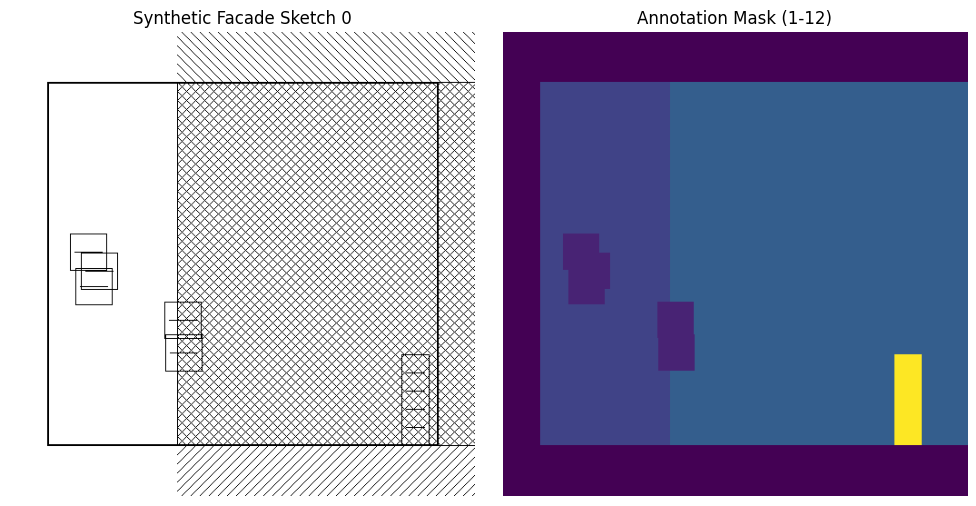

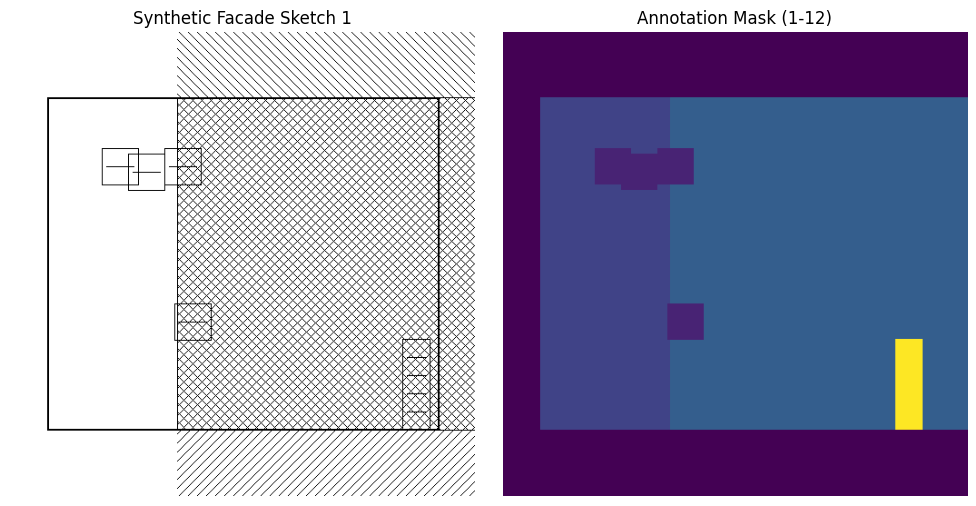

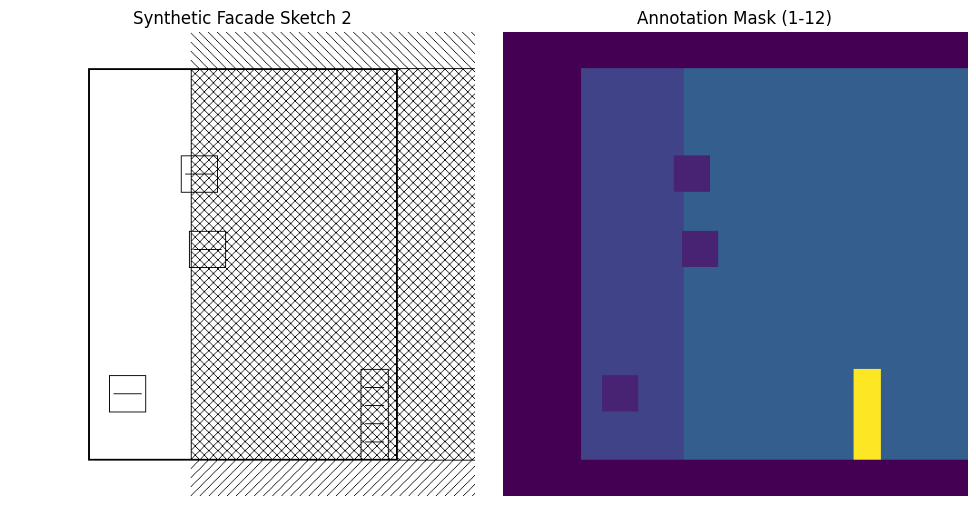

Generated 10 synthetic facade sketches and masks.


In [ ]:
import os
import numpy as np
from PIL import Image, ImageDraw
import random
import matplotlib.pyplot as plt
from pathlib import Path

def generate_synthetic_facade(width=512, height=512, idx=0):
    # Create blank canvas for sketch
    sketch = Image.new("L", (width, height), 255)  # White background
    draw = ImageDraw.Draw(sketch)
    mask = np.zeros((height, width), dtype=np.uint8)  # Segmentation mask

    # Total pixels to distribute based on CMP Facade distribution (approximate scaling)
    total_pixels = width * height
    class_dist = {
        1: 0.207,  # ~20.7%
        2: 0.427,  # ~42.7%
        3: 0.143,  # ~14.3%
        4: 0.014,  # ~1.4%
        5: 0.039,  # ~3.9%
        6: 0.029,  # ~2.9%
        7: 0.045,  # ~4.5%
        8: 0.017,  # ~1.7%
        9: 0.025,  # ~2.5%
        10: 0.113, # ~11.3%
        11: 0.025, # ~2.5%
        12: 0.034  # ~3.4%
    }  # Normalized proportions based on your output

    # Draw building outline (class 2, most common, e.g., walls)
    building_width = random.randint(int(width * 0.6), int(width * 0.9))
    building_height = random.randint(int(height * 0.7), int(height * 0.9))
    top_left = (width // 2 - building_width // 2, height // 2 - building_height // 2)
    bottom_right = (top_left[0] + building_width, top_left[1] + building_height)
    draw.rectangle([top_left, bottom_right], outline=0, width=2)
    mask[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = 2  # Wall (class 2)
    remaining_pixels = total_pixels - (building_width * building_height)

    # Draw textured wall section (class 3)
    texture_width = int(building_width * class_dist[3] / class_dist[2] * building_width)  # Proportional
    texture_x = top_left[0] + building_width // 3
    texture_box = (texture_x, top_left[1], texture_x + texture_width, bottom_right[1])
    draw.rectangle(texture_box, outline=0, width=1)
    for i in range(0, texture_width, 10):
        draw.line((texture_x + i, top_left[1], texture_x, top_left[1] + i), fill=0, width=1)
        draw.line((texture_x, bottom_right[1] - i, texture_x + i, bottom_right[1]), fill=0, width=1)
    mask[top_left[1]:bottom_right[1], texture_x:texture_x + texture_width] = 3

    # Draw windows (class 1)
    num_windows = int(class_dist[1] * total_pixels / (40 * 40))  # Approx based on window size
    window_size = 40
    for i in range(min(num_windows, 10)):  # Limit to avoid overlap
        x = random.randint(top_left[0] + 20, bottom_right[0] - window_size - 20)
        y = random.randint(top_left[1] + 20, bottom_right[1] - window_size - 20)
        if texture_x <= x <= texture_x + texture_width:
            continue
        window_box = (x, y, x + window_size, y + window_size)
        draw.rectangle(window_box, outline=0, width=1)
        draw.line((x + 5, y + window_size // 2, x + window_size - 5, y + window_size // 2), fill=0, width=1)
        mask[y:y + window_size, x:x + window_size] = 1

    # Draw staircase (class 10, significant class)
    stair_width = 30
    stair_height = 100
    stair_x = bottom_right[0] - stair_width - 10
    stair_y = bottom_right[1] - stair_height
    draw.rectangle((stair_x, stair_y, stair_x + stair_width, stair_y + stair_height), outline=0, width=1)
    for i in range(5):
        y_step = stair_y + i * (stair_height // 5)
        draw.line((stair_x + 5, y_step, stair_x + stair_width - 5, y_step), fill=0, width=1)
    mask[stair_y:stair_y + stair_height, stair_x:stair_x + stair_width] = 10

    # Add remaining classes with smaller regions (proportional to distribution)
    remaining_classes = [4, 5, 6, 7, 8, 9, 11, 12]
    region_size = 20
    for cls in remaining_classes:
        if random.random() < class_dist[cls] / class_dist[2]:  # Probability based on proportion
            x = random.randint(top_left[0] + 20, bottom_right[0] - region_size - 20)
            y = random.randint(top_left[1] + 20, bottom_right[1] - region_size - 20)
            if not (texture_x <= x <= texture_x + texture_width or stair_x <= x <= stair_x + stair_width):
                draw.rectangle((x, y, x + region_size, y + region_size), outline=0, width=1)
                mask[y:y + region_size, x:x + region_size] = cls

    # Debug: Print unique values in the mask
    print(f"Mask {idx} unique values: {np.unique(mask)}")

    return sketch, mask

# Generate and save synthetic data
output_dir = Path("synthetic_facades")
output_dir.mkdir(exist_ok=True)
image_dir = output_dir / "images"
mask_dir = output_dir / "annotations"
image_dir.mkdir(exist_ok=True)
mask_dir.mkdir(exist_ok=True)

num_samples = 10  # Reduced for debugging
for idx in range(num_samples):
    sketch, mask = generate_synthetic_facade(idx=idx)

    # Save sketch
    sketch.save(image_dir / f"image_{idx:04d}.png")

    # Save raw mask (1-12) for training
    Image.fromarray(mask, mode="L").save(mask_dir / f"annotation_{idx:04d}.png")

# Visualize a few examples to confirm
for idx in range(3):
    sketch = Image.open(image_dir / f"image_{idx:04d}.png")
    mask = np.array(Image.open(mask_dir / f"annotation_{idx:04d}.png"))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(sketch, cmap="gray")
    plt.title(f"Synthetic Facade Sketch {idx}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask)  # Adjusted for 1-12 range
    plt.title("Annotation Mask (1-12)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

print(f"Generated {num_samples} synthetic facade sketches and masks.")

Unique values in CMP Facade mask: [ 1  2  3  4  5  6  7  8  9 10 11]
Unique values in Synthetic mask: [ 0  1  2  3 10]


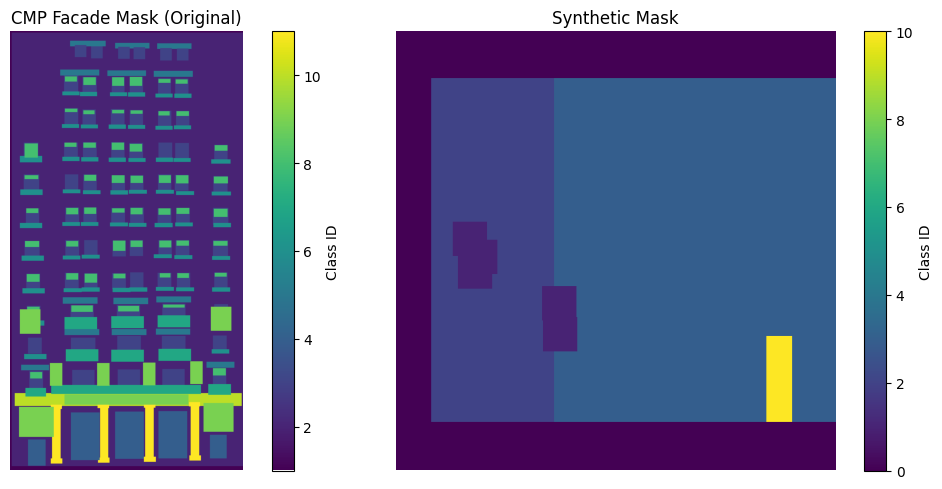


Sample pixel values for verification:
Class 1: CMP pixels = 12181, Synthetic pixels = 6518
Class 2: CMP pixels = 328822, Synthetic pixels = 52698
Class 3: CMP pixels = 60264, Synthetic pixels = 126184
Class 4: CMP pixels = 26823, Synthetic pixels = 0
Class 5: CMP pixels = 15233, Synthetic pixels = 0
Class 6: CMP pixels = 21635, Synthetic pixels = 0
Class 7: CMP pixels = 22243, Synthetic pixels = 0
Class 8: CMP pixels = 22328, Synthetic pixels = 0
Class 9: CMP pixels = 28868, Synthetic pixels = 0
Class 10: CMP pixels = 6676, Synthetic pixels = 3000
Class 11: CMP pixels = 10959, Synthetic pixels = 0
Class 12: CMP pixels = 0, Synthetic pixels = 0


In [35]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

# Define directories
cmp_base_dir = Path("../data/cmp_facade_dataset")
cmp_annotation_dir = cmp_base_dir / "annotations"
syn_base_dir = Path("synthetic_facades")
syn_annotation_dir = syn_base_dir / "annotations"

# Load sample masks
cmp_mask_path = cmp_annotation_dir / "train" / "annotation_0.png"
syn_mask_path = syn_annotation_dir / "annotation_0000.png"

# Read masks
cmp_mask = np.array(Image.open(cmp_mask_path))
syn_mask = np.array(Image.open(syn_mask_path))

# Print unique values to confirm range
print("Unique values in CMP Facade mask:", np.unique(cmp_mask))
print("Unique values in Synthetic mask:", np.unique(syn_mask))

# Visualize both masks with identical settings
plt.figure(figsize=(12, 5))

# CMP Facade mask
plt.subplot(1, 2, 1)
plt.imshow(cmp_mask, )
plt.title("CMP Facade Mask (Original)")
plt.colorbar(label="Class ID")
plt.axis("off")

# Synthetic mask
plt.subplot(1, 2, 2)
plt.imshow(syn_mask, )
plt.title("Synthetic Mask")
plt.colorbar(label="Class ID")
plt.axis("off")

plt.tight_layout()
plt.show()

# Optional: Compare specific class colors
class_ids = range(1, 13)
print("\nSample pixel values for verification:")
for class_id in class_ids:
    cmp_pixels = np.sum(cmp_mask == class_id)
    syn_pixels = np.sum(syn_mask == class_id)
    print(f"Class {class_id}: CMP pixels = {cmp_pixels}, Synthetic pixels = {syn_pixels}")

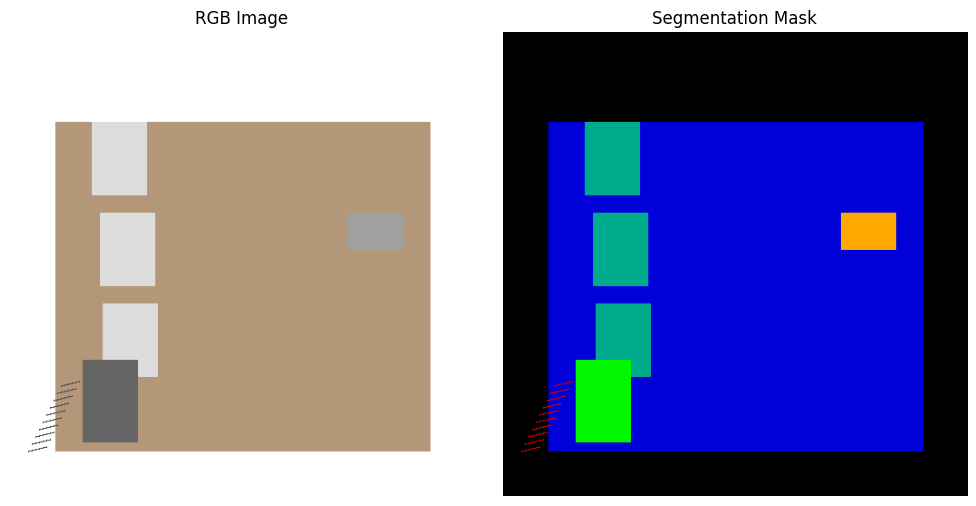

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageDraw

# Define classes and pixel values
CLASSES = {
    'background': 0,
    'wall': 50,
    'window': 100,
    'door': 150,
    'balcony': 200,
    'blinds': 220,
    'stairs': 240
}

# Image size
IMG_WIDTH = 512
IMG_HEIGHT = 512

def generate_facade_image():
    img = Image.new("RGB", (IMG_WIDTH, IMG_HEIGHT), color=(255, 255, 255))
    mask = Image.new("L", (IMG_WIDTH, IMG_HEIGHT), color=CLASSES['background'])

    draw_img = ImageDraw.Draw(img)
    draw_mask = ImageDraw.Draw(mask)

    # Wall block
    wall_x0 = 50
    wall_y0 = 100
    wall_x1 = IMG_WIDTH - 50
    wall_y1 = IMG_HEIGHT - 50
    draw_img.rectangle([wall_x0, wall_y0, wall_x1, wall_y1], fill=(180, 150, 120))
    draw_mask.rectangle([wall_x0, wall_y0, wall_x1, wall_y1], fill=CLASSES['wall'])

    # Windows
    for i in range(3):
        x = random.randint(wall_x0 + 20, wall_x1 - 120)
        y = wall_y0 + i * 100
        w, h = 60, 80
        draw_img.rectangle([x, y, x + w, y + h], fill=(220, 220, 220))
        draw_mask.rectangle([x, y, x + w, y + h], fill=CLASSES['window'])

    # Door
    x = wall_x0 + 30
    y = wall_y1 - 100
    draw_img.rectangle([x, y, x + 60, y + 90], fill=(100, 100, 100))
    draw_mask.rectangle([x, y, x + 60, y + 90], fill=CLASSES['door'])

    # Balcony (optional)
    if random.random() > 0.5:
        bx = wall_x1 - 90
        by = wall_y0 + 100
        draw_img.rectangle([bx, by, bx + 60, by + 40], fill=(160, 160, 160))
        draw_mask.rectangle([bx, by, bx + 60, by + 40], fill=CLASSES['balcony'])

    # Blinds (optional)
    if random.random() > 0.5:
        x = wall_x0 + 100
        y = wall_y0 + 100
        draw_img.rectangle([x, y, x + 60, y + 10], fill=(60, 60, 60))
        draw_mask.rectangle([x, y, x + 60, y + 10], fill=CLASSES['blinds'])

    # Stairs (spiral)
    if random.random() > 0.5:
        for step in range(10):
            x = wall_x0 - 30 + step * 4
            y = wall_y1 - step * 8
            draw_img.line([(x, y), (x + 20, y - 5)], fill=(80, 80, 80), width=2)
            draw_mask.line([(x, y), (x + 20, y - 5)], fill=CLASSES['stairs'], width=2)

    return img, mask

def plot_sample(img, mask):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img)
    ax[0].set_title('RGB Image')
    ax[0].axis('off')
    ax[1].imshow(mask, cmap='nipy_spectral', vmin=0, vmax=255)
    ax[1].set_title('Segmentation Mask')
    ax[1].axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
img, mask = generate_facade_image()
plot_sample(img, mask)

# Save example
img.save('synthetic_facade.png')
mask.save('synthetic_facade_mask.png')
